In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [91]:
trial_data = pd.read_csv('Resources/clinicaltrial_data.csv', low_memory=False)
mouse_data = pd.read_csv('Resources/mouse_drug_data.csv', low_memory=False)

In [92]:
# g989 Stelasyn and Propriva

In [93]:
# Add Drug column to trial_data
mousedrug = {}
drug = []
counter = 0
for i in mouse_data['Mouse ID']:
    mousedrug[i] = mouse_data['Drug'][counter]
    counter += 1
for i in trial_data['Mouse ID']:
    if i in mousedrug:
        drug.append(mousedrug[i])
len(drug)
trial_data = trial_data.assign(Drug= drug)

In [94]:
# Group trial_data by Drug and Time
drug_time_group = trial_data.groupby(['Drug', 'Timepoint'])

In [95]:
# Find means of the tumor volume changes
tumor_time_metast_mean = drug_time_group.mean()
ttmm = tumor_time_metast_mean.reset_index()
tumor_time_m = ttmm.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tt_mean = tumor_time_m.reset_index()
tt_mean.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


In [96]:
# Find standart errors
tumor_time_metast_sem = drug_time_group.sem()
ttms = tumor_time_metast_sem.reset_index()
tumor_time_sem = ttms.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tt_err = tumor_time_sem.reset_index()
tt_err.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


In [116]:
# Make basis for plots
# Colors can be changed, as well as any other drugs can be added or excluded from a list, if someone wants to.
colorcycle = cycle(['r', 'g', 'b', 'orange'])
markercycle = cycle(['d', '3', 'P', 'v', '8', 'h'])
drug_list = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']

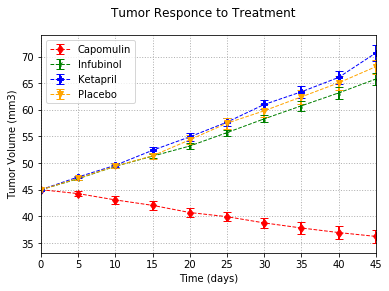

In [117]:
# Create subplots
fig, ax = plt.subplots()
ax.set_xlim(tt_mean['Timepoint'][0], tt_mean['Timepoint'].max(), 1)

for drug in tt_mean.columns:
    if drug in drug_list:
        ax.errorbar(tt_mean['Timepoint'], tt_mean[drug], tt_err[drug], c = next(colorcycle),
                        linestyle='dashed', fmt=next(markercycle), label=drug, linewidth=1, capsize=4, elinewidth=2)
    
fig.suptitle('Tumor Responce to Treatment', fontsize=12)

ax.set_xlabel('Time (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.grid(linestyle='dotted', linewidth=1)
ax.legend()

In [9]:
metast_time = ttm.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metast_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


In [10]:
micecount = drug_time_group.count()
mc = micecount.reset_index()
surv_rate = mc.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
surv_rate.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,24,25
5,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17


In [11]:
first = tumor_time.iloc[0,:]
last = tumor_time.iloc[-1,:]
diff = last - first
pers = first/100*diff
pers

Drug
Capomulin    -3.943749
Ceftamin      8.609590
Infubinol     9.340003
Ketapril     11.548331
Naftisol     10.919478
Placebo      10.387837
Propriva      9.566338
Ramicane     -4.519982
Stelasyn     10.547240
Zoniferol     9.432400
dtype: float64